# İmporting libraries:
*Matplotlib helps draw visual graphs

*Sklearn is oldschool machine learning library. We will use three functions of it

*Keras is high level machine learning library which uses Tensorflow or Theano background. Tensorflow and Theano both are low level machine learning libraries. Keras helps us to use theese low level libraries with simple functions. Now we use Keras with Tensorflow background.

In [2]:
# USAGE
# python train_simple_nn.py --dataset animals --model output/simple_nn.model --label-bin output/simple_nn_lb.pickle --plot output/simple_nn_plot.png

# set the matplotlib backend so figures can be saved in the background
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,5]

# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from glob import glob

Using TensorFlow backend.


In [6]:
PROJECT_DIR = os.path.dirname("/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/")

# Data Preprocessing:


In [7]:
imagePaths  = [y for x in os.walk(PROJECT_DIR+'/'+'animals/') for y in glob(os.path.join(x[0], '*.jpg'))]
#we use random.seed to make generated the same random values in every time
random.seed(12)
#We are shuffling it because
random.shuffle(imagePaths)
#Print first 10 imagePaths
imagePaths[0:10]

['/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/dogs/dogs_00854.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/cats/cats_00965.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/dogs/dogs_00608.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/dogs/dogs_00317.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/cats/cats_00712.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/panda/panda_00725.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/dogs/dogs_00399.jpg',
 '/home/mutlu/Public/My-Machine-Learning-and-Deep-Learning-Journey/Keras_Animal_Classification/animals/panda/panda_00531.jp

In [8]:
labels = []
data = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    '''
    Each image has different aspect ratio. Therefore we need to resize it.
    We will not use convolutional neural network. We will use simple neural network.
    Therefore we need to flatten the 32x32x3 images.
    '''   
    image = cv2.resize(image, (32, 32))
    image = image.flatten()
    #print(image.shape)
    data.append(image)
    '''
    if you print os.path.sep, it prints forward slash (/) file seperator.
    We are splitting file paths with forward slash and get the folder name
    that shows us the class of that image
    '''
    labels.append(imagePath.split(os.path.sep)[-2])
    

In [9]:
# Convert these arrays into Numpy array and scale the raw pixel intensities to the range [0, 1] to converge faster.
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [10]:
#You cannot use these numpy properties without converting the array to the numpy array
data.shape
print(data.shape)
print(labels.shape)

(3000, 3072)
(3000,)


In [11]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=12)
print(trainX.shape)

# convert the labels from integers to vectors (for 2-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)
print(trainY[:5])
print(testY[:5])
lb = LabelBinarizer() 

'''
Converting into one hot array. We call it one hot because one value is 'hot' in each array.
A call to fit_transform  finds all unique class labels in trainY  and then transforms them into one-hot encoded labels.
A call to just .transform  on testY  performs just the one-hot encoding step — the unique set of possible class labels 
was already determined by the call to .fit_transform .
'''
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY[:5])
print(testY[:5])
print(lb.classes_)

(2250, 3072)
['dogs' 'panda' 'panda' 'cats' 'dogs']
['panda' 'dogs' 'dogs' 'panda' 'panda']
[[0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
['cats' 'dogs' 'panda']


# Width and depth of the network
Define the <span style="color:red;"><i>(3072 input nodes)->(1024 hidden nodes)->(512 hidden nodes)->(3 output nodes)</i></span>  architecture using Keras

In [12]:
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax")) #lb.classes_ prints ['cats' 'dogs' 'panda'] --> help(lb)

In [14]:
learning_rate = 0.001
epochs = 25
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=learning_rate)
#If there is 2 classes you would want to swap out "categorical_crossentropy"  for "binary_crossentropy" .
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=16)

[INFO] training network...
Train on 2250 samples, validate on 750 samples
Epoch 1/25
2250/2250 [==============================] - 11s 5ms/step - loss: 1.0958 - acc: 0.3671 - val_loss: 1.0925 - val_acc: 0.3480
Epoch 2/25
2250/2250 [==============================] - 9s 4ms/step - loss: 1.0917 - acc: 0.3609 - val_loss: 1.0902 - val_acc: 0.4027
Epoch 3/25
2250/2250 [==============================] - 11s 5ms/step - loss: 1.0883 - acc: 0.4160 - val_loss: 1.0870 - val_acc: 0.4520
Epoch 4/25
2250/2250 [==============================] - 12s 5ms/step - loss: 1.0835 - acc: 0.4227 - val_loss: 1.0932 - val_acc: 0.4627
Epoch 5/25
2250/2250 [==============================] - 10s 5ms/step - loss: 1.0802 - acc: 0.4529 - val_loss: 1.0820 - val_acc: 0.4627
Epoch 6/25
2250/2250 [==============================] - 11s 5ms/step - loss: 1.0751 - acc: 0.4538 - val_loss: 1.0758 - val_acc: 0.4973
Epoch 7/25
2250/2250 [==============================] - 11s 5ms/step - loss: 1.0724 - acc: 0.4862 - val_loss: 1.0748 

[INFO] evaluating network...
             precision    recall  f1-score   support

       cats       0.56      0.04      0.08       243
       dogs       0.47      0.67      0.55       263
      panda       0.55      0.80      0.65       244

avg / total       0.52      0.51      0.43       750



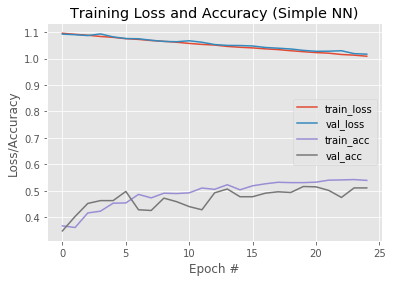

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Precision is hitting the subject class trully.
It can know 35 percent none cat pictures that they are none cat.
F1 Score is a tool to do trade-off between precision and recall. F1 is middle of the precision and recall. F0.5 closer to the precision. F10 is closer to the recall.

In [16]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save(os.path.join(PROJECT_DIR,"output/DenseNN.model"))
f = open(os.path.join(PROJECT_DIR,"output/CatDogPanda.pickle"), "wb")
f.write(pickle.dumps(lb))
f.close()


[INFO] serializing network and label binarizer...
